# FUEL CONSUMPTION PREDICTION USING LINEAR REGRESSION

With increasing concerns about environmental sustainability and the impact of transportation on climate change, understanding the relationship between vehicle attributes and their environmental consequences is critical. The "Vehicle Attributes and Emissions Dataset," which includes detailed information about vehicles manufactured in the year 2000, offers an opportunity to analyze key factors such as engine size, fuel consumption, and CO2 emissions. However, insights into how these attributes influence fuel efficiency and emissions across different vehicle types remain underexplored.

## Importing libraries

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Importing Dataset

In [58]:
df = pd.read_excel('FuelCons.xlsx')
df.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,1.6,4,10.5,216
1,1.6,4,9.8,205
2,3.2,6,13.7,265
3,3.5,6,15.0,301
4,1.8,4,11.4,230


## Exploratory Data Analysis

In [59]:
df.describe()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.000000,639.000000,639.000000,639.000000
mean,3.265728,5.805947,14.713615,296.809077
std,1.231012,1.625588,3.307044,65.504178
min,1.000000,3.000000,4.900000,104.000000
25%,2.200000,4.000000,12.500000,253.000000
50%,3.000000,6.000000,14.400000,288.000000
75%,4.300000,6.000000,16.600000,343.000000
max,8.000000,12.000000,30.200000,582.000000


In [60]:
df.shape

(639, 4)

In [61]:
#Checking nulls
df.isnull().sum()

ENGINE SIZE         0
CYLINDERS           0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

In [62]:
#Checking duplicates
df.duplicated().sum()

182

In [65]:
#Feature Selection
X = df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']]
y = df['COEMISSIONS']

## Model Training

In [66]:
#Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
#Fitting in Data into the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predictions

In [68]:
y_pred = model.predict(X_test)

# Model Evaluation

In [73]:
r2 = r2_score(y_test, y_pred)
r2

0.9846361749926678

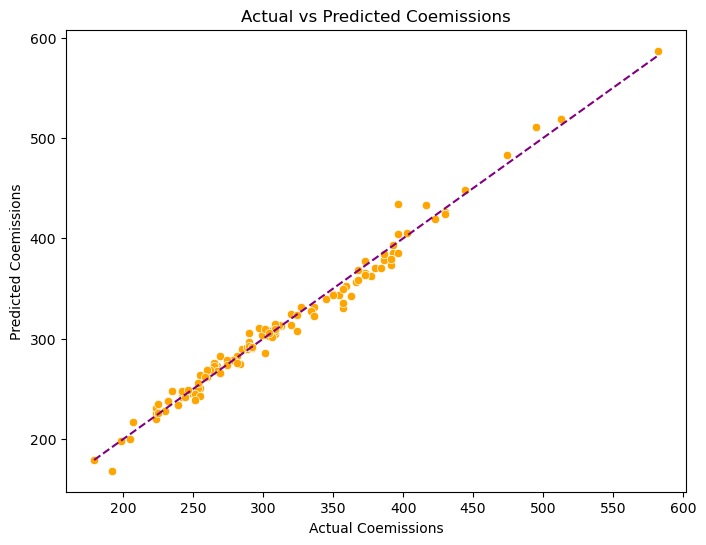

In [75]:
#Showing visual representation of actual values vs Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="orange", edgecolor="w")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="purple", linestyle="--")
plt.title("Actual vs Predicted Coemissions")
plt.xlabel("Actual Coemissions")
plt.ylabel("Predicted Coemissions")
plt.show()

C:\Users\JULIET\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


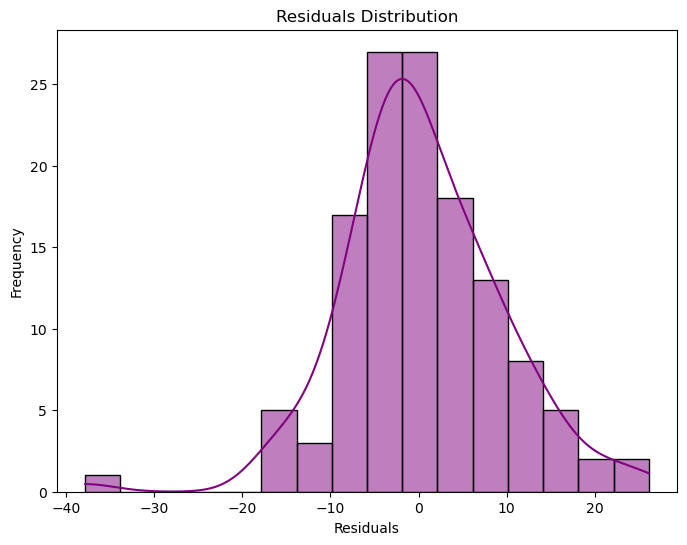

In [77]:
# Showing the residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [79]:
df["Predicted COEMISSIONS"] = model.predict(X)
df_with_predictions = pd.concat([df, df["Predicted COEMISSIONS"]], axis=1)
df_with_predictions.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS,Predicted COEMISSIONS,Predicted COEMISSIONS
0,1.6,4,10.5,216,213.482691,213.482691
1,1.6,4,9.8,205,199.921108,199.921108
2,3.2,6,13.7,265,276.191481,276.191481
3,3.5,6,15.0,301,302.693987,302.693987
4,1.8,4,11.4,230,231.796818,231.796818


## Conclusion
Based on the analysis of the dataset and the performance of the linear regression model, several key insights emerged:

Model Accuracy:
The high R2 score of 0.985 indicates that the model effectively explains 98.5% of the variance in CO2 emissions based on engine size, cylinder count, and fuel consumption. This suggests that these features are strong predictors of emissions, making the model reliable for practical applications within the scope of the dataset.

Key Factors Affecting Emissions:

1. Fuel Consumption had the strongest influence on CO2 emissions, as expected. Vehicles with higher fuel consumption tend to produce significantly more emissions.
2. Engine Size and Cylinders also positively correlate with emissions, with larger engines and more cylinders generally contributing to higher CO2 outputs.